In [1]:
import pandas as pd
import numpy as np
import os
import random

# visualizations
import matplotlib.pyplot as plt
from IPython.display import Image
from mlxtend.plotting import heatmap
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
%matplotlib inline

# sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, average_precision_score

# tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers

In [2]:
# let's input data
train = pd.read_csv('../Data/processed_data/train.csv')
test = pd.read_csv('../Data/processed_data/test.csv')
validation = pd.read_csv('../Data/processed_data/validation.csv')
# onehot encoding
train = pd.get_dummies(train, columns = ['label'], prefix ='', prefix_sep='', dtype=int)
test = pd.get_dummies(test, columns = ['label'], prefix ='', prefix_sep='', dtype=int)
validation = pd.get_dummies(validation, columns = ['label'], prefix ='', prefix_sep='', dtype=int)

In [3]:
X_train = train.iloc[:,1:27]
y_train = train.iloc[:,-2]
X_test = test.iloc[:,1:27]
y_test = test.iloc[:,-2]
X_validation = validation.iloc[:,1:27]
y_validation = validation.iloc[:,-2]

In [4]:
sc_x = StandardScaler()
X_train_std = sc_x.fit(X_train).transform(X_train)
X_test_std = sc_x.fit(X_train).transform(X_test)
X_validation_std = sc_x.fit(X_train).transform(X_validation)

In [5]:
def build_model(num_features,
                n_classes,
                hidden_layer_sizes=[],
                drop_rate = 0.3,
                learning_rate=0.01):
    
    
    """Build a FNN based on hw6, live section 3
    """
    
    tf.keras.backend.clear_session()
    np.random.seed(0)
    tf.random.set_seed(0)

    model = tf.keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),name='Input'))


    # add hidden layers
    count_hidden = 1
    for i in hidden_layer_sizes:
        model.add(tf.keras.layers.Dense(units=i,
                                        use_bias=True,
                                        activation='relu',
                                        name='hidden_layer_' + str(count_hidden)
                                       ))
        model.add(tf.keras.layers.Dropout(rate=drop_rate, name='Dropout' + str(count_hidden)))
        count_hidden +=1
    
    # create output layer
    model.add(keras.layers.Dense(
      units=n_classes,
      use_bias=True,
      activation=None,
      name='Output'
    ))
    
    
    
    # set a optimizer dictionary
    options = {'SGD': tf.keras.optimizers.legacy.SGD(learning_rate=learning_rate), 
               'Adam': tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)}
    
    # Create optimizer
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate),
        metrics=[tf.keras.metrics.BinaryAccuracy()])
    model.summary()
    return model

In [6]:
# build model
model = build_model(num_features = X_train_std.shape[1],
                    n_classes = 1,
                    hidden_layer_sizes=[5,2],
                    drop_rate = 0.2,
                    learning_rate=0.01)

# train model
num_epochs = 30
batch_size=50
# es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=500)
hist = model.fit(
                x=X_train_std,
                y=y_train,
                epochs=num_epochs,
                batch_size=batch_size,
                validation_data = (X_validation_std, y_validation),
                # callbacks=[es],
                verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 5)                 135       
                                                                 
 Dropout1 (Dropout)          (None, 5)                 0         
                                                                 
 hidden_layer_2 (Dense)      (None, 2)                 12        
                                                                 
 Dropout2 (Dropout)          (None, 2)                 0         
                                                                 
 Output (Dense)              (None, 1)                 3         
                                                                 
Total params: 150 (600.00 Byte)
Trainable params: 150 (600.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-08-03 22:32:13.649492: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-08-03 22:32:13.649529: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-08-03 22:32:13.649537: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-08-03 22:32:13.649762: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-03 22:32:13.649788: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-08-03 22:32:14.087354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 22:32:14.766517:

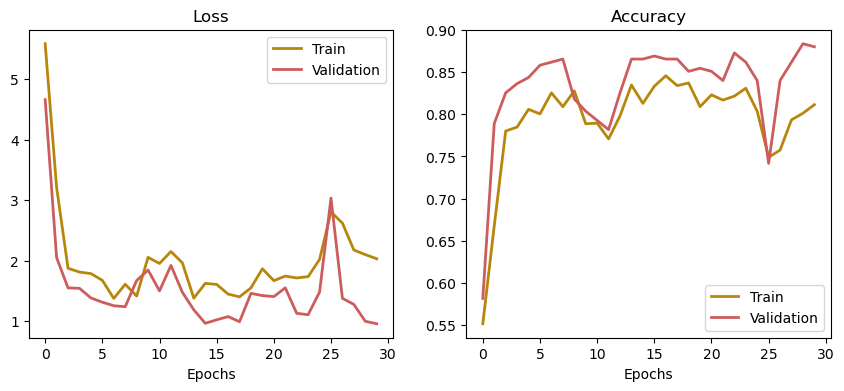

In [7]:
# grab history
history = hist.history

# plot loss for train and validation
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=2, color='darkgoldenrod')
plt.plot(history['val_loss'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Loss');

# plot accuracy for train and validation
ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=2, color='darkgoldenrod')
plt.plot(history['val_binary_accuracy'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Accuracy');

1/9 [==>...........................] - ETA: 0s

2023-08-03 22:32:20.994454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 3ms/step
Training, misclassified examples: 102
Training, prediction accuracy: 0.920
------------
Training, misclassified examples: 33
Training, prediction accuracy: 0.880
------------
Test, misclassified examples: 22
Test, prediction accuracy: 0.920


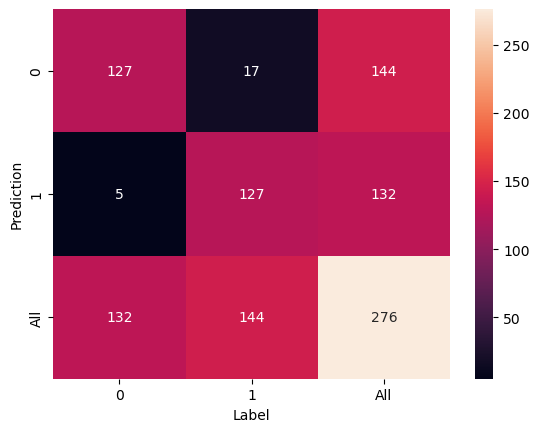

In [8]:
y_train_pred = model.predict(x=X_train_std).flatten()

# apply the threshold function to create a 0, 1 outcome
y_train_pred = np.where(y_train_pred>=0.5, 1, 0)


y_validation_pred = model.predict(x=X_validation_std).flatten()
y_validation_pred = np.where(y_validation_pred>=0.5, 1, 0)


# run the trained model on the test data (the model outputs probabilities)
y_pred_prob = model.predict(x=X_test_std).flatten()
# apply the threshold function to create a 0, 1 outcome
y_pred = np.where(y_pred_prob>=0.5, 1, 0)


# print accuracy for train
print('Training, misclassified examples: %d' % (y_train != y_train_pred).sum())
error_train_tf = (y_train != y_train_pred).sum()/len(y_train_pred)
print('Training, prediction accuracy: %.3f'% (1-error_train_tf))

print('------------')
print('Training, misclassified examples: %d' % (y_validation != y_validation_pred).sum())
error_train_tf = (y_validation != y_validation_pred).sum()/len(y_validation_pred)
print('Training, prediction accuracy: %.3f'% (1-error_train_tf))

print('------------')

# print accuracy for test

print('Test, misclassified examples: %d' % (y_test != y_pred).sum())
error_test_tf = (y_test != y_pred).sum()/len(y_pred)
print('Test, prediction accuracy: %.3f'% (1-error_test_tf))

confusion_matrix = pd.crosstab(y_pred,y_test, rownames=['Prediction'], colnames=['Label'],margins = True)
sns.heatmap(confusion_matrix, annot=True,fmt='g')
pass

In [9]:
# Looking at precision, recall and F1 scores
print('Precision score: %.3f' % precision_score(y_test, y_pred, average='macro'))
print('Recall score: %.3f' % recall_score(y_test, y_pred, average='macro'))
print('F1 score %.3f' % f1_score(y_test, y_pred, average='macro'))

Precision score: 0.922
Recall score: 0.922
F1 score 0.920


In [10]:
# Looking at the classification report
print('\n Classification report for k=5:\n', classification_report(y_test, y_pred))


 Classification report for k=5:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       132
           1       0.96      0.88      0.92       144

    accuracy                           0.92       276
   macro avg       0.92      0.92      0.92       276
weighted avg       0.92      0.92      0.92       276



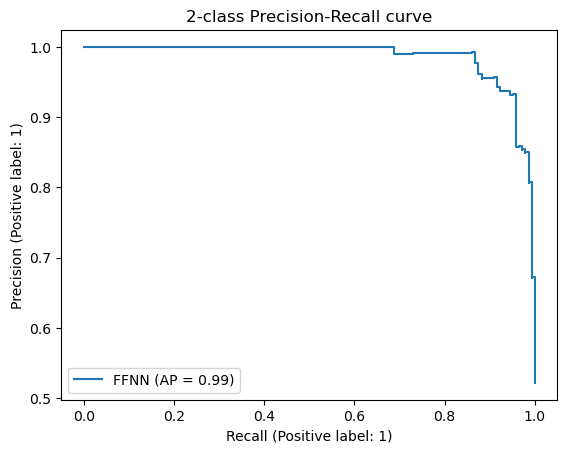

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_pred_prob, name="FFNN"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
pd.DataFrame(y_pred_prob).to_csv('../Data/model_predictions/FFNN_model.csv')